<a href="https://www.kaggle.com/lchipham/exploring-the-bitcoin-cryptocurrency-market?scriptVersionId=88414455" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility**

Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future1. In fact, on the 6th of December of 2017, Bitcoin has a market capitalization above $200 billion.

![](https://www.nationalworld.com/webimg/b25lY21zOjE0MGUxZjkyLWY2ZDUtNDg1Ni1iODZjLTcxZmI1NDJmYTI5ZDo4ZTE2Nzc5MC0xZjRhLTQxNzItYWRiMS1jYmYyNjY3OGNmZmQ=.jpg?width=2048&enable=upscale)

In [1]:
# Import pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

# Read dataset into pandas
dec6 = pd.read_csv("../input/exploring-the-bitcoin-cryptocurrency-market/coinmarketcap_06122017.csv")

In [2]:
# Select 'id' and 'market_cap_usd' columns
market_cap_raw = dec6[["id", "market_cap_usd"]]
market_cap_raw.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [3]:
# Count number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

## **2. Remove NaN: Cryptocurrencies without a market cap**

There is a descrepancy between the count of id and count of market cap in usd. This means that there are cryptocurrencies that do not have a market capitalization. It is best practice to remove these cryptocurrencies.

In [4]:
# Filter out rows without a market cap
cap = market_cap_raw.query('market_cap_usd > 0')
cap.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [5]:
# Count number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

## 3. How big is Bitcoin compared with the rest of the cryptocurrencies

Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. We will now plot the market capitalization for the top 10 coins as a barplot to better visualize this.

In [6]:
# Delcare theme for plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Select first 10 rows and setting index
cap10 = cap[:10].set_index('id')
cap10

,market_cap_usd
id,
bitcoin,2.130493e+11
ethereum,4.352945e+10
bitcoin-cash,2.529585e+10
iota,1.475225e+10
ripple,9.365343e+09
dash,5.794076e+09
litecoin,5.634498e+09
bitcoin-gold,4.920065e+09
monero,4.331688e+09


Text(0, 0.5, '% of total cap')

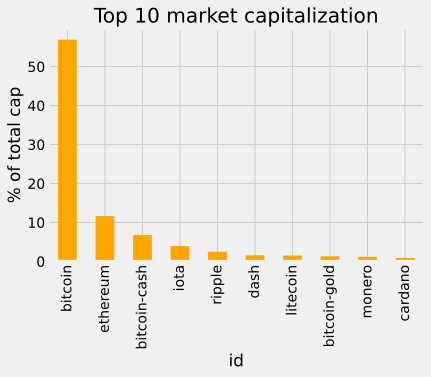

In [7]:
# Calculate market_cap_perc, assign to cap10 
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) *100)

# Bar plot with title defined above
ax = cap10['market_cap_perc'].plot.bar(title = TOP_CAP_TITLE, color = "orange")

# Annotate y axis with label defined above
ax.set_ylabel(TOP_CAP_YLABEL)

## Make plot easier to read, more informative

While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, we'll use a **log10 scale** of the **"raw" capitalization**. We will also **use color to group similar coins** and make the plot more informative1.
For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin blockchain2. Ethereum and Cardano both offer Turing Complete smart contracts. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.

This coloring is a simplification. There are more differences and similarities that are not being represented here.

The bitcoin forks are actually very different, but it is out of scope to talk about them here. Please see the warning above and do your own research.

Text(0.5, 0, '')

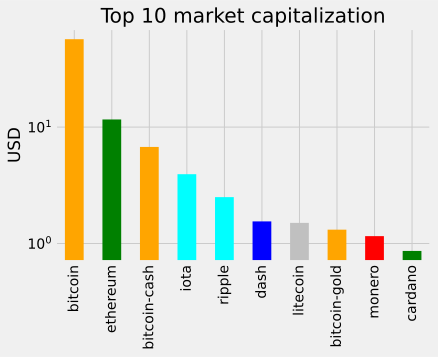

In [8]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Add colors and y-axis scaling to the plot
ax = cap10['market_cap_perc'].plot.bar(title = TOP_CAP_TITLE, logy = True, color = COLORS)

# Annotating the y axis with log(USD)
ax.set_ylabel('USD')

# Remove x-axis label
ax.set_xlabel('')

## **5. Volatility in cryptocurrencies**

The cryptocurrencies market has been spectacularly volatile since the first exchange opened. We will begin to explore this volatility by selecting and plotting the 24 hours and 7 days percentage change.

In [9]:
# Select id, percent_change_24h, percent_change_7d from dec6
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Set index to id, remove NaN values
volatility = volatility.set_index('id').dropna()

# Sort dataframe by percent_change_24h, ascending order
volatility = volatility.sort_values('percent_change_24h')

# Overview
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## **6. Losses in Market Cap**

It is clear from the dataframe above that you can face huge losses on cryptocurrencies. We will now plot the **top 10 biggest gainers** and **top 10 losers** in market cap.

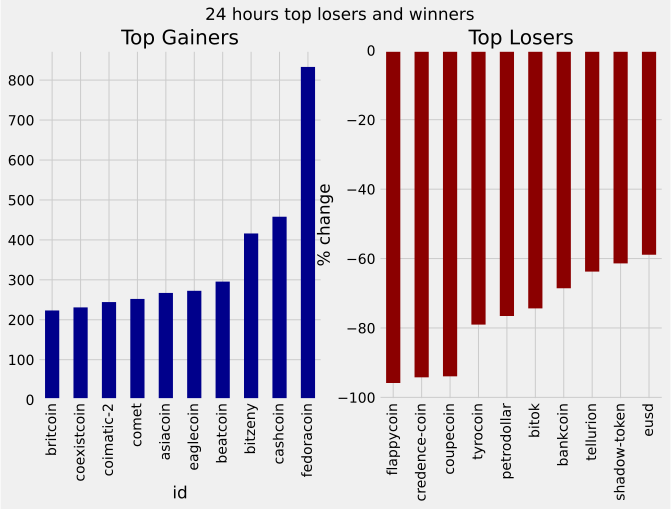

In [10]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[1], title = "Top Losers")
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('% change')
    # Remove x label
    ax.set_xlabel('')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[0], title = "Top Gainers")
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

## **Weekly Series**

Reuse the function defined above to explore the weekly % change instead of daily.

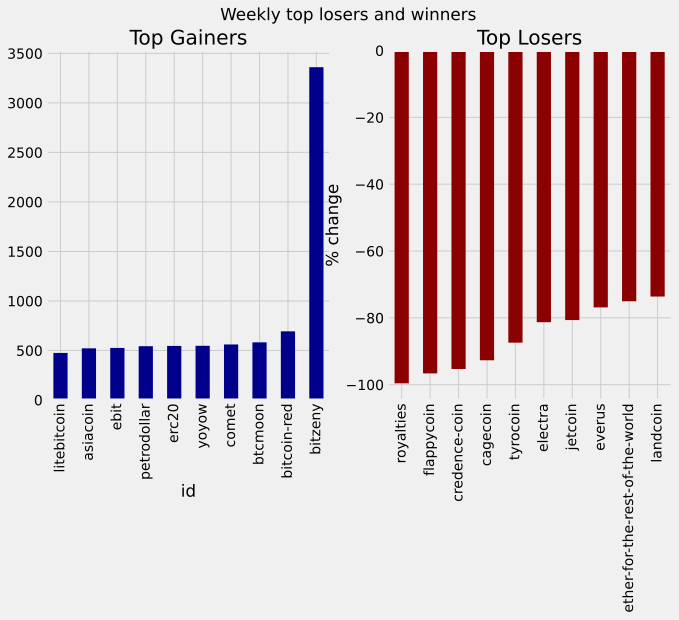

In [11]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d')

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

## **8. Classify Cryptocurrencies**

There is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones1. We will now classify the dataset based on [Investopedia](https://www.investopedia.com/video/play/large-cap/)'s capitalization definitions for company stocks.

*Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a commodity instead.*

These are the market cap definitions from Investopedia:

Large cap: +10 billion
Mid cap: 2 billion - 10 billion
Small cap: 300 million - 2 billion
Micro cap: 50 million - 300 million
Nano cap: Below 50 million

In [12]:
# Select cryptos with market cap over 10 billion dollar
largecaps = cap.query('market_cap_usd > 1E+10')
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


Text(0.5, 0, '')

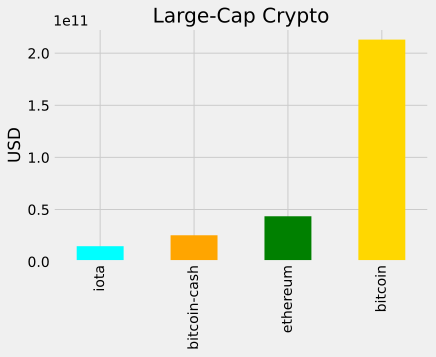

In [13]:
# Plot these cryptos for comparison
largecaps = largecaps.sort_values('market_cap_usd')
largecaps = largecaps.set_index('id')
largecap_plot = largecaps['market_cap_usd'].plot.bar(title = "Large-Cap Crypto", color = ['cyan', 'orange', 'green', 'gold'])
largecap_plot.set_ylabel("USD")
largecap_plot.set_xlabel("")

## **9. Market Cap Groups**

Text(0.5, 1.0, 'Market Cap Groups')

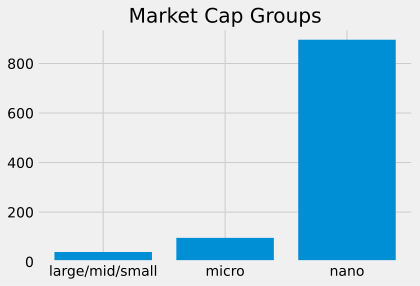

In [14]:
# Function to count different market caps from cap dataframe -> return int
def capcount(query_string):
    return cap.query(query_string).count().id

# Plot labels
LABELS = ['large/mid/small', 'micro', 'nano']

# Using capcount count the large/mid/small cryptos
large_mid_small = capcount('market_cap_usd > 3E+8')

# Using capcount count the micro cryptos
micro = capcount('market_cap_usd >= 5E+7 & market_cap_usd < 3E+8')

# Using capcount count the macro cryptos
macro = capcount('market_cap_usd < 5E+7')

# List of 3 counts
values = [large_mid_small, micro, macro]

# Plot 3 market cap counts with matplotlib
plt.bar(range(len(values)), values, tick_label = LABELS)
plt.title("Market Cap Groups")
